참조 코드 : https://haystar.tistory.com/11

In [ ]:
# pip install konlpy

In [ ]:
# pip install git+https://github.com/haven-jeon/PyKoSpacing.git

In [58]:
import re
import pandas as pd
import numpy as np
from tqdm import tqdm
from konlpy.tag import Okt
from pykospacing import Spacing
from collections import Counter

# 시각화
import matplotlib.pyplot as plt
from matplotlib import rc  
import seaborn as sns

# word cloud
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
# #코랩 한글 깨짐 현상 해결방법 > 안될 시 런타임 다시 시작해보기

!apt-get update -qq
!apt-get install fonts-nanum* -qq

import matplotlib.font_manager as fm
import warnings
warnings.filterwarnings(action='ignore') 

path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf' # 나눔 고딕
font_name = fm.FontProperties(fname=path, size=10).get_name() # 기본 폰트 사이즈 : 10
plt.rc('font', family=font_name)
fm._rebuild()

In [ ]:
df1 = pd.read_csv("/content/test_1.csv")
df2 = pd.read_csv("/content/test_1_nodrop.csv")

In [ ]:
df1.head()

,index,name,addresse,review,review_num
0,0,제일양대창,서울 성동구 고산자로 281 2층 (우)04708,대존맛 ㅠㅠ,424
1,1,제일양대창,서울 성동구 고산자로 281 2층 (우)04708,평이 너무 좋길래 기대를 너무 해서 그런건지.. 아니면 나랑 친구가 느끼한걸 못먹는...,424
2,2,제일양대창,서울 성동구 고산자로 281 2층 (우)04708,가격이 원래먹던데보다 비싸긴 하지만 곱창도 부드럽고 곱이 가득들어있어서 너무고소...,424
3,3,제일양대창,서울 성동구 고산자로 281 2층 (우)04708,여기는 진짜 맛있어요. 직원분들이 직접 구워주시는데 그래서 더 맛있는 거 같아요. ...,424
4,4,제일양대창,서울 성동구 고산자로 281 2층 (우)04708,대 존 맛 맛집 잘 안기다리는데 여긴 기다려서라도 먹음,424


In [ ]:
df1.tail()

,index,name,addresse,review,review_num
2712,6753,곱분이곱창 길음점,서울 성북구 길음로13길 22 두산위브아파트 상가동 108호 (우)02715,곱창볶음에는 맥주입니다. 양도 항상 많고 곱창도 많아요... 동네에 이런 곳이 ...,2
2713,6754,곱분이곱창 길음점,서울 성북구 길음로13길 22 두산위브아파트 상가동 108호 (우)02715,포장해가면 주먹밥이나 음료 서비스라고 하십니다,2
2714,6761,곱창박사 구로봉동점,서울 구로구 오리로 1270 (우)08256,사장님이 정말 친절하시고 곱창이 오동통해서 너무 맛있어요 !!!!!! 곱창먹을땐 여...,1
2715,6762,곱창박사 구로봉동점,서울 구로구 오리로 1270 (우)08256,곱창 막창 전골 다 맛있고 사장님 너무 친절하세용,1
2716,6765,곱창박사 구로봉동점,서울 구로구 오리로 1270 (우)08256,엄청 친절하시고 푸짐해요.,1


In [ ]:
df2.head()

,name,addresse,review,review_num
0,제일양대창,서울 성동구 고산자로 281 2층 (우)04708,대존맛 ㅠㅠ,424
1,제일양대창,서울 성동구 고산자로 281 2층 (우)04708,평이 너무 좋길래 기대를 너무 해서 그런건지.. 아니면 나랑 친구가 느끼한걸 못먹는...,424
2,제일양대창,서울 성동구 고산자로 281 2층 (우)04708,가격이 원래먹던데보다 비싸긴 하지만 곱창도 부드럽고 곱이 가득들어있어서 너무고소...,424
3,제일양대창,서울 성동구 고산자로 281 2층 (우)04708,여기는 진짜 맛있어요. 직원분들이 직접 구워주시는데 그래서 더 맛있는 거 같아요. ...,424
4,제일양대창,서울 성동구 고산자로 281 2층 (우)04708,대 존 맛 맛집 잘 안기다리는데 여긴 기다려서라도 먹음,424


# 한국 표현만 남기기

정규 표현식을 이용하여 한글 단어만 남기고 모두 제외하기
의미없는 기호, 이모티콘, 초성, 영어 제거

In [ ]:
def extract_word(text):
  hangul = re.compile('[^가-힣]')
  result = hangul.sub(' ', text) # 문자열 패턴 바꾸기
  return result

In [ ]:
print("Before Extraction : ",df1['review'][2712])
print("After Extraction : ", extract_word(df1['review'][2712]))

print("Before Extraction : ",df1['review'][2714])
print("After Extraction : ", extract_word(df1['review'][2714]))

Before Extraction :  곱창볶음에는 맥주입니다.  양도 항상 많고 곱창도 많아요...  동네에 이런 곳이 있어서 정말 좋네요! 직원분들도 친절하시고 매장이 깨끗해서 좋아요~~
After Extraction :  곱창볶음에는 맥주입니다   양도 항상 많고 곱창도 많아요     동네에 이런 곳이 있어서 정말 좋네요  직원분들도 친절하시고 매장이 깨끗해서 좋아요  
Before Extraction :  사장님이 정말 친절하시고 곱창이 오동통해서 너무 맛있어요 !!!!!! 곱창먹을땐 여기 갈거예요 대박 나시길!
After Extraction :  사장님이 정말 친절하시고 곱창이 오동통해서 너무 맛있어요        곱창먹을땐 여기 갈거예요 대박 나시길 


In [ ]:
df1['hangul review'] = df1['review'].apply(lambda x:extract_word(x))

# 띄어쓰기 고치기 : pykospacing 


https://wikidocs.net/92961

In [ ]:
spacing = Spacing()
print("Before Fixing : ", df1['review'][1])
print("After Fixing : ", spacing(df1['review'][1]))
print("Before Fixing : ", df1['review'][4])
print("After Fixing : ", spacing(df1['review'][4]))

Before Fixing :  평이 너무 좋길래 기대를 너무 해서 그런건지.. 아니면 나랑 친구가 느끼한걸 못먹는건지.. 그냥 너무 느끼했어요ㅠ
After Fixing :  평이 너무 좋길래 기대를 너무 해서 그런 건지.. 아니면 나랑 친구가 느끼한 걸 못 먹는 건지.. 그냥 너무 느끼했어요ㅠ
Before Fixing :  대 존 맛  맛집 잘 안기다리는데 여긴 기다려서라도 먹음
After Fixing :  대 존 맛 맛집 잘 안 기다리는데 여긴 기 다려서라도 먹음


In [ ]:
a = "안녕하세요심야식당입니다집에가고싶네요"
print(spacing(a))

안녕하세요심야 식당입니다 집에 가고 싶네요


In [ ]:
df1['spacing review'] = df1['hangul review'].apply(lambda x: spacing(x))

In [ ]:
df1

,index,name,addresse,review,review_num,hangul review,spacing review
0,0,제일양대창,서울 성동구 고산자로 281 2층 (우)04708,대존맛 ㅠㅠ,424,대존맛,대존 맛
1,1,제일양대창,서울 성동구 고산자로 281 2층 (우)04708,평이 너무 좋길래 기대를 너무 해서 그런건지.. 아니면 나랑 친구가 느끼한걸 못먹는...,424,평이 너무 좋길래 기대를 너무 해서 그런건지 아니면 나랑 친구가 느끼한걸 못먹는...,평이 너무 좋길래 기대를 너무 해서 그런 건지 아니면 나랑 친구가 느끼한 걸 못 먹...
2,2,제일양대창,서울 성동구 고산자로 281 2층 (우)04708,가격이 원래먹던데보다 비싸긴 하지만 곱창도 부드럽고 곱이 가득들어있어서 너무고소...,424,가격이 원래먹던데보다 비싸긴 하지만 곱창도 부드럽고 곱이 가득들어있어서 너무고소...,가격이 원래 먹던데보다 비싸긴 하지만 곱창도 부드럽고 곱이 가득 들어 있어서 너무 ...
3,3,제일양대창,서울 성동구 고산자로 281 2층 (우)04708,여기는 진짜 맛있어요. 직원분들이 직접 구워주시는데 그래서 더 맛있는 거 같아요. ...,424,여기는 진짜 맛있어요 직원분들이 직접 구워주시는데 그래서 더 맛있는 거 같아요 ...,여기는 진짜 맛있어요 직원 분들이 직접 구워주시는데 그래서 더 맛있는 거 같아 요 ...
4,4,제일양대창,서울 성동구 고산자로 281 2층 (우)04708,대 존 맛 맛집 잘 안기다리는데 여긴 기다려서라도 먹음,424,대 존 맛 맛집 잘 안기다리는데 여긴 기다려서라도 먹음,대 존 맛 맛집 잘 안 기다리는데 여긴 기 다려서라도 먹음
...,...,...,...,...,...,...,...
2712,6753,곱분이곱창 길음점,서울 성북구 길음로13길 22 두산위브아파트 상가동 108호 (우)02715,곱창볶음에는 맥주입니다. 양도 항상 많고 곱창도 많아요... 동네에 이런 곳이 ...,2,곱창볶음에는 맥주입니다 양도 항상 많고 곱창도 많아요 동네에 이런 곳이 ...,곱창 볶음에는 맥주입니다 양도 항상 많고 곱창도 많아요 동네에 이런 곳이 있어서 정...
2713,6754,곱분이곱창 길음점,서울 성북구 길음로13길 22 두산위브아파트 상가동 108호 (우)02715,포장해가면 주먹밥이나 음료 서비스라고 하십니다,2,포장해가면 주먹밥이나 음료 서비스라고 하십니다,포장해가면 주먹밥이나 음료 서비스라고 하십니다
2714,6761,곱창박사 구로봉동점,서울 구로구 오리로 1270 (우)08256,사장님이 정말 친절하시고 곱창이 오동통해서 너무 맛있어요 !!!!!! 곱창먹을땐 여...,1,사장님이 정말 친절하시고 곱창이 오동통해서 너무 맛있어요 곱창먹을땐 여...,사장님이 정말 친절하시고 곱창이 오동 통해서 너무 맛있어요 곱창 먹을 땐 여기 갈 ...
2715,6762,곱창박사 구로봉동점,서울 구로구 오리로 1270 (우)08256,곱창 막창 전골 다 맛있고 사장님 너무 친절하세용,1,곱창 막창 전골 다 맛있고 사장님 너무 친절하세용,곱창 막창 전골 다 맛있고 사장님 너무 친절하세용


# 형태소 분석 :  Okt모델

 형태소 단위로 분리해서 count를 세는게 목적 ->  여러 리뷰들을 하나의 리스트 원소로 합쳐서 형태소를 분리한 뒤 Counter 객체로 빈도수를 보려 함

In [ ]:
okt = Okt()
words = " ".join(df1['spacing review'].tolist())
words = okt.morphs(words, stem  = True) # 형태소 추출

In [ ]:
words

['대',
 '존',
 '맛',
 '평이',
 '너무',
 '좋다',
 '기대',
 '를',
 '너무',
 '하다',
 '그렇다',
 '건지다',
 '아니다',
 '나',
 '랑',
 '친구',
 '가',
 '느끼하다',
 '걸',
 '못',
 '먹다',
 '건지다',
 '그냥',
 '너무',
 '느끼하다',
 '가격',
 '이',
 '원래',
 '먹다',
 '비싸다',
 '하지만',
 '곱창',
 '도',
 '부드럽다',
 '곱',
 '이',
 '가득',
 '들다',
 '있다',
 '너무',
 '고소하다',
 '직원',
 '분',
 '이',
 '친절하다',
 '손질',
 '해주다',
 '설명',
 '도',
 '잘',
 '해주다',
 '편하다',
 '먹다',
 '곁들이다',
 '먹다',
 '게',
 '많다',
 '더',
 '맛있다',
 '거',
 '같다',
 '소스',
 '도',
 '넘다',
 '맛있다',
 '대창',
 '에',
 '와사비',
 '같이',
 '먹다',
 '질리다',
 '않다',
 '술술',
 '먹다',
 '되다',
 '직원',
 '분들',
 '진짜',
 '친절하다',
 '웨이팅',
 '이',
 '있다',
 '하지만',
 '별관',
 '본관',
 '본관',
 '층',
 '까지',
 '사용',
 '하다',
 '최대한',
 '웨이',
 '여기다',
 '진짜',
 '맛있다',
 '직원',
 '분',
 '들',
 '이',
 '직접',
 '굽다',
 '그래서',
 '더',
 '맛있다',
 '거',
 '같다',
 '요',
 '곱',
 '도',
 '신선하다',
 '들어가다',
 '주시',
 '는',
 '순',
 '두',
 '부',
 '찌개',
 '진짜',
 '맛있다',
 '대다',
 '존',
 '맛',
 '맛집',
 '자다',
 '안',
 '기다리다',
 '여기다',
 '기',
 '다리다',
 '서다',
 '먹음',
 '오다',
 '진짜',
 '맛있다',
 '가세',
 '요',
 '진짜',
 '가세',
 '요',
 '꼭',
 '가세',
 '요',
 '웨이',

In [ ]:
len(words)

59377

# 한 글자, 불용어 제거

- 유의미한 글자 : 맛, 곱, 맵, 양, 질, 굿, 밥, 술

In [ ]:
# 59377 -> 39941

remove_one_word = [x for x in words if len(x)>1 or x == "맛" or x == "곱" or x == "맵" or x == "양" or x == "질" or x == "굿" or x == "밥" or x == "술"]
len(remove_one_word)

39941

In [ ]:
# 확인해보기
remove_one_word

['맛',
 '평이',
 '너무',
 '좋다',
 '기대',
 '너무',
 '하다',
 '그렇다',
 '건지다',
 '아니다',
 '친구',
 '느끼하다',
 '먹다',
 '건지다',
 '그냥',
 '너무',
 '느끼하다',
 '가격',
 '원래',
 '먹다',
 '비싸다',
 '하지만',
 '곱창',
 '부드럽다',
 '곱',
 '가득',
 '들다',
 '있다',
 '너무',
 '고소하다',
 '직원',
 '친절하다',
 '손질',
 '해주다',
 '설명',
 '해주다',
 '편하다',
 '먹다',
 '곁들이다',
 '먹다',
 '많다',
 '맛있다',
 '같다',
 '소스',
 '넘다',
 '맛있다',
 '대창',
 '와사비',
 '같이',
 '먹다',
 '질리다',
 '않다',
 '술술',
 '먹다',
 '되다',
 '직원',
 '분들',
 '진짜',
 '친절하다',
 '웨이팅',
 '있다',
 '하지만',
 '별관',
 '본관',
 '본관',
 '까지',
 '사용',
 '하다',
 '최대한',
 '웨이',
 '여기다',
 '진짜',
 '맛있다',
 '직원',
 '직접',
 '굽다',
 '그래서',
 '맛있다',
 '같다',
 '곱',
 '신선하다',
 '들어가다',
 '주시',
 '찌개',
 '진짜',
 '맛있다',
 '대다',
 '맛',
 '맛집',
 '자다',
 '기다리다',
 '여기다',
 '다리다',
 '서다',
 '먹음',
 '오다',
 '진짜',
 '맛있다',
 '가세',
 '진짜',
 '가세',
 '가세',
 '웨이',
 '극악',
 '직원',
 '불친절',
 '하지만',
 '맛',
 '엄청',
 '있다',
 '먹다',
 '보다',
 '곱창',
 '제일',
 '맛있다',
 '곱창',
 '대창',
 '살짝',
 '느끼하다',
 '뻔하다',
 '순두부찌개',
 '잡다',
 '주네',
 '처음',
 '에는',
 '맛있다',
 '먹다',
 '번째',
 '가다',
 '많이',
 '느끼하다',
 '처음',
 '처럼',
 '맛있다',
 '않다',
 '그

# 단어 빈도 확인
collections의 Counter객체를 이용

In [ ]:
frequent = Counter(remove_one_word).most_common()
frequent

[('하다', 1532),
 ('곱창', 1487),
 ('맛있다', 1174),
 ('먹다', 1152),
 ('맛', 900),
 ('너무', 562),
 ('있다', 515),
 ('가다', 474),
 ('없다', 446),
 ('좋다', 431),
 ('친절하다', 377),
 ('보다', 368),
 ('진짜', 343),
 ('이다', 310),
 ('양', 292),
 ('많다', 288),
 ('여기', 273),
 ('사장', 257),
 ('되다', 254),
 ('볶음밥', 248),
 ('오다', 237),
 ('같다', 235),
 ('으로', 232),
 ('나오다', 231),
 ('직원', 225),
 ('가격', 218),
 ('에서', 217),
 ('맛집', 211),
 ('막창', 211),
 ('않다', 200),
 ('정말', 199),
 ('아니다', 195),
 ('자다', 176),
 ('시키다', 175),
 ('최고', 172),
 ('곱', 168),
 ('서비스', 161),
 ('그냥', 156),
 ('다른', 155),
 ('들다', 151),
 ('사람', 151),
 ('싶다', 150),
 ('그렇다', 141),
 ('주다', 133),
 ('대창', 129),
 ('굽다', 128),
 ('전골', 128),
 ('인데', 128),
 ('나다', 127),
 ('별로', 124),
 ('주문', 118),
 ('정도', 118),
 ('적다', 117),
 ('비싸다', 116),
 ('넘다', 115),
 ('까지', 114),
 ('하고', 113),
 ('갈다', 112),
 ('엄청', 111),
 ('양도', 111),
 ('냄새', 108),
 ('손님', 106),
 ('처음', 105),
 ('많이', 105),
 ('하나', 105),
 ('모르다', 101),
 ('방문', 100),
 ('테이블', 100),
 ('생각', 99),
 ('야채', 99),
 ('지다', 9

# 기본 불용어 제거

stopwords 텍스트 파일을 이용하여 제거하기

In [ ]:
df3 = pd.read_csv("/content/stopwords.csv", encoding = "cp949")

In [ ]:
df3

,휴,아이구,아이쿠,아이고,어,나,우리,저희,따라,의해,...,애,랑,오다.1,들다,그렇다.1,이렇다.1,대한.1,이건.1,라는.1,지만.1


In [ ]:
# 59377 -> 39941 -> 27253

stopwords = df3
remove_stopwords = [x for x in remove_one_word if x not in stopwords]
len(remove_stopwords)

27253

# counter 객체로 빈도 수 다시 확인
- 조금 더 유의미한 단어 검출


In [ ]:
Counter(remove_stopwords).most_common()

[('곱창', 1487),
 ('맛있다', 1174),
 ('먹다', 1152),
 ('맛', 900),
 ('좋다', 431),
 ('친절하다', 377),
 ('양', 292),
 ('많다', 288),
 ('사장', 257),
 ('볶음밥', 248),
 ('직원', 225),
 ('가격', 218),
 ('맛집', 211),
 ('막창', 211),
 ('자다', 176),
 ('최고', 172),
 ('곱', 168),
 ('서비스', 161),
 ('사람', 151),
 ('대창', 129),
 ('굽다', 128),
 ('전골', 128),
 ('별로', 124),
 ('주문', 118),
 ('적다', 117),
 ('비싸다', 116),
 ('갈다', 112),
 ('양도', 111),
 ('냄새', 108),
 ('손님', 106),
 ('처음', 105),
 ('방문', 100),
 ('테이블', 100),
 ('생각', 99),
 ('야채', 99),
 ('지다', 98),
 ('포장', 94),
 ('질', 90),
 ('자주', 89),
 ('괜찮다', 87),
 ('좋아하다', 86),
 ('가게', 85),
 ('여기다', 81),
 ('밥', 81),
 ('음식', 81),
 ('인분', 78),
 ('추가', 76),
 ('불친절하다', 76),
 ('해주다', 74),
 ('쓰다', 73),
 ('깔끔하다', 71),
 ('기분', 71),
 ('가성', 70),
 ('최악', 67),
 ('들어가다', 65),
 ('친구', 63),
 ('인지', 63),
 ('서다', 62),
 ('기름', 60),
 ('추천', 59),
 ('분들', 57),
 ('아쉽다', 57),
 ('모듬', 57),
 ('느낌', 57),
 ('인생', 57),
 ('양념', 57),
 ('돼지', 56),
 ('기다리다', 54),
 ('리뷰', 54),
 ('위생', 53),
 ('고기', 53),
 ('동네', 52),
 ('고소하다', 5

In [ ]:
len(Counter(remove_stopwords).most_common())

3747

# 최소 횟수 이하 단어 제거
- 유의미한 단어라고 봐야하나?

In [ ]:
for item, count in Counter(remove_stopwords).most_common():
  if count == 1:
    print(item)

질리다
진시
딸램
잔치
상이
불가하다
따뜻하다
난이도
두시
가림
밀리
버터
포인트
갈릴
무언가
무젹건
약속
소진
차량
싣다
운치
배려
확보
도리
은하계
생크림
가닥
제해
둔감하다
미끄럽다
놀이터
답시고
어깨
통화
줄곧
평상시
그만
년전
제공
몰리다
질겨짐
오래됨
작렬
진창
기름밥
접종
음성
큐웁
츕츕
내미다
가락동
진양곱챵
위스키
갈비살
명가
양미
수선하다
연말
젤라또
안녕
살아오다
된장국
야금야금
럈어
흐리다
가렵
주지
채식
넓히다
거고
갈아
멕힙니
가겐
거예
했엉
구조
꽃대
물리
섭하다
영혼
단체
선호
스미다
내달
죄송스럽다
어쩌
여사
러시
시렁
하자
티좀
내지
곰창
탁하다
태임
후추
재채기
어코
다고
하필
대상
깡패
든지
인수
차별
맛날
찜찜하다
논현동
개조
조증
갔슴
박아
차서
져서
들여놓다
깨끗
지지
귀신
호기심
당시
낭비
특집
각지
으로서는
공릉동
여유
로운
우기
성웅
어딘가
남겨지다
당분간
잊혀지다
요금
저렇게
불향
공릉
봣는데
느꼇네
집입
김창렬
재밌듬
수요일
목요일
축축
꿀꿀
벗다
손바닥
환전
것임
갈바
피날레
마시기
상치
시끌벅적
고급스럽다
제법
복근
서운하다
치팅
데이
파리
식기
일욜
생으로
흡입
이외
문집
합치다
다짐
풍기다
차선
반개
핀잔
재개발
폭발
토박이
러버
매출
막입
알겟스
행보
맛깔나다
알콜
앞머리
딷쒸
쫀득양
흙맛
현장
에서의
반영
절대로
에게도
바글
내리막
아마도
광진구
득실
득실하다
차지
헛배
부정
다드
수돗물
웡슐랭
가이드
명확하다
발생
강력하다
유우
구리시
밍밍
우웩
짐함
깜놀
이라기보단
율도
유머
솜씨
아쥬
세모
크크
알알이
소요
차요
합리
스텝
불량하다
사적
방어
어떠하다
연결
군자
울림
목격
알반
조폭
시리다
일임
바임
세타
루고
따라가다
풀어지다
흉내
였음
상식
벗어나다
야들야들하다
사르르
야무지다
푸대접
나가야
개혼
반절
프런트
크르릉
왈왈왈왈왈
컹컹
와르
소한
창맛
곱새
낙곱
짜이다
질김
낙지
새우
결코
지성
라이벌
떨구다
원형
철제
더디다
조리도
거품
글쎄
레트로
컨셉
참새
쳐다봣
따개
세탁
저자
세로
문정

In [ ]:
minimum_count = 3
more_than_one_time= []
for i in tqdm(range(len(remove_stopwords))):
    tmp = remove_stopwords[i]
    if remove_stopwords.count(tmp) >= minimum_count:
        more_than_one_time.append(tmp)

100%|██████████| 27253/27253 [00:27<00:00, 992.02it/s] 


In [ ]:
Counter(more_than_one_time).most_common()

[('곱창', 1487),
 ('맛있다', 1174),
 ('먹다', 1152),
 ('맛', 900),
 ('좋다', 431),
 ('친절하다', 377),
 ('양', 292),
 ('많다', 288),
 ('사장', 257),
 ('볶음밥', 248),
 ('직원', 225),
 ('가격', 218),
 ('맛집', 211),
 ('막창', 211),
 ('자다', 176),
 ('최고', 172),
 ('곱', 168),
 ('서비스', 161),
 ('사람', 151),
 ('대창', 129),
 ('굽다', 128),
 ('전골', 128),
 ('별로', 124),
 ('주문', 118),
 ('적다', 117),
 ('비싸다', 116),
 ('갈다', 112),
 ('양도', 111),
 ('냄새', 108),
 ('손님', 106),
 ('처음', 105),
 ('방문', 100),
 ('테이블', 100),
 ('생각', 99),
 ('야채', 99),
 ('지다', 98),
 ('포장', 94),
 ('질', 90),
 ('자주', 89),
 ('괜찮다', 87),
 ('좋아하다', 86),
 ('가게', 85),
 ('여기다', 81),
 ('밥', 81),
 ('음식', 81),
 ('인분', 78),
 ('추가', 76),
 ('불친절하다', 76),
 ('해주다', 74),
 ('쓰다', 73),
 ('깔끔하다', 71),
 ('기분', 71),
 ('가성', 70),
 ('최악', 67),
 ('들어가다', 65),
 ('친구', 63),
 ('인지', 63),
 ('서다', 62),
 ('기름', 60),
 ('추천', 59),
 ('분들', 57),
 ('아쉽다', 57),
 ('모듬', 57),
 ('느낌', 57),
 ('인생', 57),
 ('양념', 57),
 ('돼지', 56),
 ('기다리다', 54),
 ('리뷰', 54),
 ('위생', 53),
 ('고기', 53),
 ('동네', 52),
 ('고소하다', 5

In [ ]:
cnt_list = Counter(more_than_one_time).most_common()

In [ ]:
# 3747 -> 1318
type(cnt_list), len(cnt_list), 

(list, 1318)

In [ ]:
# df1.to_csv('zero_제일양대창.csv',index=False)

# 중간 점검용 시각화

In [ ]:
cnt_list = np.array(cnt_list)
cnt_list.shape

(1318, 2)

In [ ]:
col_name = ['word', 'count']
pd_cnt_list = pd.DataFrame(cnt_list, columns = col_name)
pd_cnt_list = pd_cnt_list.set_index("word")
pd_cnt_list.shape

(1318, 1)

In [ ]:
pd_cnt_list["count"]

word
곱창     1487
맛있다    1174
먹다     1152
맛       900
좋다      431
       ... 
바싹        3
듬뿍        3
신월동       3
장다리       3
재성        3
Name: count, Length: 1318, dtype: object

In [ ]:
pd_cnt_list['count'] = pd.to_numeric(pd_cnt_list['count'])

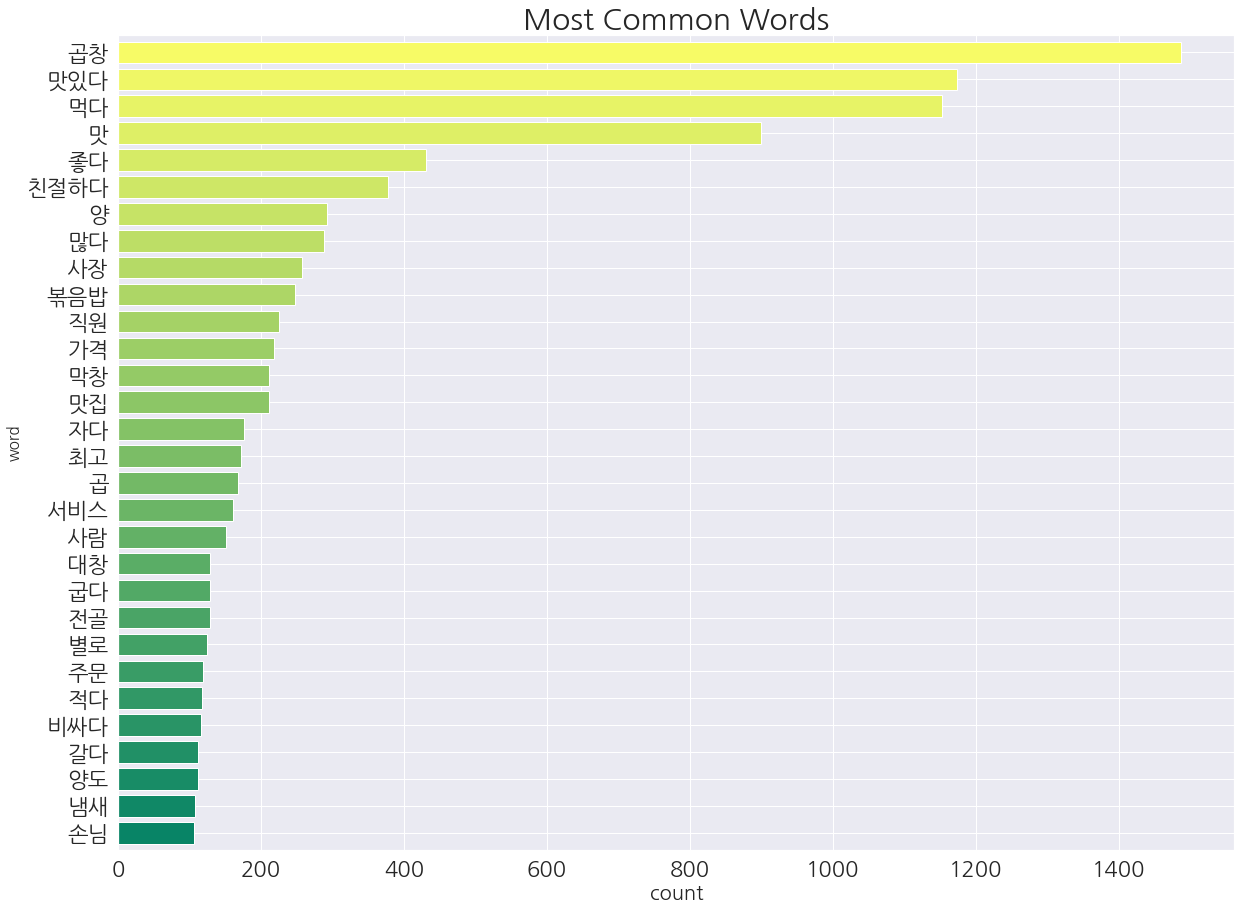

In [ ]:
# 빈도수 시각화하기
# 내림차순 정렬
sns.set(font_scale=2) 
plt.rc('font', family = font_name)

colors = sns.color_palette('summer', len(pd_cnt_list['count'][:30]))

pd_cnt_list['count'][:30].sort_values().plot(
    kind = 'barh', 
    figsize=(20,15),
    width = 0.8,
    color =  colors,
    grid = True)
plt.title("Most Common Words", fontsize = 30)
plt.xlabel('count', fontsize=20)
plt.ylabel('word', fontsize=15)
plt.show()

##Word Cloud

In [ ]:
# word cloud용 dataframe을 위해 다시 reset
wc_df = pd_cnt_list.reset_index()
wc_df

,word,count
0,곱창,1487
1,맛있다,1174
2,먹다,1152
3,맛,900
4,좋다,431
...,...,...
1313,바싹,3
1314,듬뿍,3
1315,신월동,3
1316,장다리,3


In [ ]:
# 생성된 데이터 프레임을 딕셔너리로 전환
wc = wc_df.set_index("word").to_dict()["count"]
wc

{'곱창': 1487,
 '맛있다': 1174,
 '먹다': 1152,
 '맛': 900,
 '좋다': 431,
 '친절하다': 377,
 '양': 292,
 '많다': 288,
 '사장': 257,
 '볶음밥': 248,
 '직원': 225,
 '가격': 218,
 '맛집': 211,
 '막창': 211,
 '자다': 176,
 '최고': 172,
 '곱': 168,
 '서비스': 161,
 '사람': 151,
 '대창': 129,
 '굽다': 128,
 '전골': 128,
 '별로': 124,
 '주문': 118,
 '적다': 117,
 '비싸다': 116,
 '갈다': 112,
 '양도': 111,
 '냄새': 108,
 '손님': 106,
 '처음': 105,
 '방문': 100,
 '테이블': 100,
 '생각': 99,
 '야채': 99,
 '지다': 98,
 '포장': 94,
 '질': 90,
 '자주': 89,
 '괜찮다': 87,
 '좋아하다': 86,
 '가게': 85,
 '여기다': 81,
 '밥': 81,
 '음식': 81,
 '인분': 78,
 '추가': 76,
 '불친절하다': 76,
 '해주다': 74,
 '쓰다': 73,
 '깔끔하다': 71,
 '기분': 71,
 '가성': 70,
 '최악': 67,
 '들어가다': 65,
 '친구': 63,
 '인지': 63,
 '서다': 62,
 '기름': 60,
 '추천': 59,
 '분들': 57,
 '아쉽다': 57,
 '모듬': 57,
 '느낌': 57,
 '인생': 57,
 '양념': 57,
 '돼지': 56,
 '기다리다': 54,
 '리뷰': 54,
 '위생': 53,
 '고기': 53,
 '동네': 52,
 '고소하다': 50,
 '불친절': 50,
 '소주': 50,
 '구이': 49,
 '아깝다': 49,
 '말다': 49,
 '친절': 49,
 '항상': 49,
 '잡다': 47,
 '기본': 47,
 '부추': 47,
 '비다': 47,
 '기다': 47,
 '술': 45

(-0.5, 999.5, 999.5, -0.5)

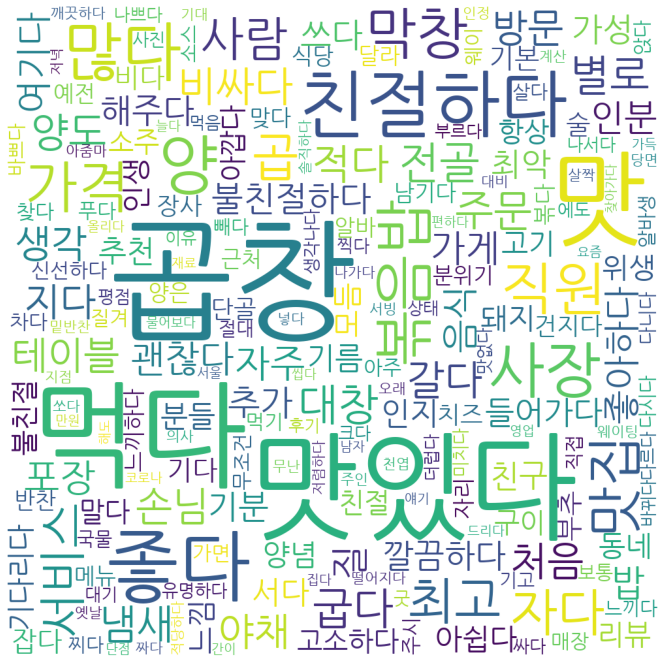

In [ ]:
# word cloud
wordcloud = WordCloud(
    font_path = font_name,
    width = 1000, 
    height = 1000, 
    max_font_size = 200,
    background_color = "white"
    ).generate_from_frequencies(wc)

plt.figure(figsize = (12,12))
plt.imshow(wordcloud)
plt.axis('off')

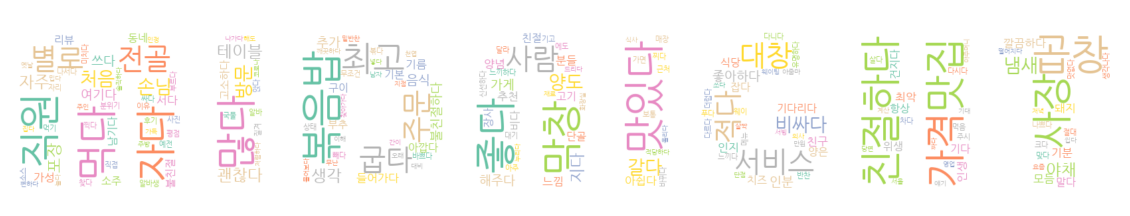

In [64]:
# Generate a word cloud image
stopwords = set(STOPWORDS)
mask = np.array(Image.open("/content/midnight.png"))
wordcloud = WordCloud(
    width = 3000, height = 2000, 
    font_path = font_name, max_font_size = 100,
    random_state=1, background_color='white', 
    colormap='Set2', collocations=False, 
    stopwords = STOPWORDS,mask=mask).generate(' '.join(wc))
# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[20,20])
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
# store to file
plt.savefig("news.png", format="png") 
plt.show()

# TF-IDF
-단어마다 점수를 매겨서 중요도를 표시
- 코드 참조 : https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=vangarang&logNo=221072014624

In [ ]:
# t is token
# d is document == tokens
def f(t, d):
    return d.count(t)

def tf(t, d):
    return 0.5 + 0.5*f(t,d)/max([f(w,d) for w in d])

. log는 어차피 결과 값의 범위를 다운스케일링 하려는 목적

In [ ]:
from math import log10

def idf(t, D):
    # D is documents == document list
    numerator = len(D)
    denominator = 1 + len([ True for d in D if t in d])
    return log10(numerator/denominator)

TF-IDF는 이 둘을 곱한 결과

In [ ]:
def tfidf(t, d, D):
    return tf(t,d)*idf(t, D)

 문서군을 주면 각 단어의 TF-IDF 점수를 옆에 표시해주는 TFIDF Scorer 함수

In [ ]:
def tokenizer(d):
    return d.split()

def tfidfScorer(D):
    tokenized_D = [tokenizer(d) for d in D]
    result = []
    for d in tokenized_D:
        result.append([(t, tfidf(t, d, tokenized_D)) for t in d])
    return result

test 돌려보기

In [ ]:
lst_one = list(df1[df1["name"] == "제일양대창"]["review"])
lst_one

['대존맛 ㅠㅠ',
 '평이 너무 좋길래 기대를 너무 해서 그런건지.. 아니면 나랑 친구가 느끼한걸 못먹는건지.. 그냥 너무 느끼했어요ㅠ',
 '가격이 원래먹던데보다  비싸긴 하지만  곱창도 부드럽고 곱이 가득들어있어서 너무고소했고 직원분이 친절하게 손질해주시고 설명도 잘해주셔서 편하게 먹었어요  곁들여 먹을게 많아서 더 맛있었던거 같네요 소스도 넘 맛있고 대창에 와사비 같이 먹으니까 질리지도않고 술술먹게됨 -직원분들 진짜 친절함 -웨이팅이 있긴하지만 별관,본관, 본관2층 까지 사용하여 최대한 웨이...',
 '여기는 진짜 맛있어요. 직원분들이 직접 구워주시는데 그래서 더 맛있는 거 같아요. 곱도 신선하고 들어가자마자 주시는 순두부찌개 진짜 맛있어요',
 '대 존 맛  맛집 잘 안기다리는데 여긴 기다려서라도 먹음',
 '와.. 진짜 맛있습니다 가세요 진짜 가세요 꼭 가세요',
 '웨이팅 극악.. 직원불들 불친절.. 하지만 맛은 엄청 있어요',
 '먹어본 곱창중에 제일 맛있어요 곱창대창 살짝 느끼할뻔한걸 순두부찌개가 잡아주네여',
 '처음에는 맛있게 먹었는데 두번째 갔을때는  많이 느끼해서 처음 처럼 맛있지는 않았어요ㅜㅠ 그래도 다른곳 보다 맛있기는 한거 같아요',
 '가게가 너~무 시끄럽고 기다려서 먹을 맛은 아님',
 '오후 4시에 갔는데 만석.. 다들 뭐하는 사람들이지?? 이 이른 시간에~~ 먹어보니 그럴 만 하네요.  재방문 의사 1000%',
 '자주갔더니 좀 느끼하네요',
 '딸램이가 곱창 먹고싶다해서 검색하고 맛있다고 해서 카카오맵 보니 영업중이라고 나오더라구요.  수량소진시 주문 못한다해서 택시타고 갔는데 휴무...ㅜㅡㅜ 딸램이 아쉬워서 바라만 보다 왔네요',
 '진짜 곱창 여기저기 많이먹어봤는데 여기만한곳이 없어요ㅠㅠ 대파김치랑 찍어먹는소스도 진짜 맛있고 구워주시는분도 친절하시고 기본으로 주는 전골도 엄청 실하게 나오고 좀 비싸긴하지만 한번쯤은 다시 가보고싶은 곳이네용 앞에 대기 40팀이라서 한시간 반 기다렸는데 웨이팅 걸어놓고 다른곳 돌아다니다

In [ ]:
# test로 돌려보기

if __name__ == '__main__':
    corpus = ['평이 너무 좋길래 기대를 너무 해서 그런 건지 아니면 나랑 친구가 느끼한 걸 못 먹는 건지 그냥 너무 느끼했어요',
              '가격이 원래 먹던데보다 비싸긴 하지만 곱창도 부드럽고 곱이 가득 들어 있어서 너무 고소했고 직원분이 친절하게 손질해주시고 설명도 잘해주셔서 편하게 먹었어요 곁들여 먹을 게 많아서 더 맛있었던 거 같네요 소스도 넘 맛있고 대창에 와사비 같이 먹으니까 질리지도 않고 술술 먹게 됨',
              '여기는 진짜 맛있어요  직원분들이 직접 구워주시는데 그래서 더 맛있는 거 같아요  곱도 신선하고 들어가자마자 주시는 순두부찌개 진짜 맛있어요',
              '대 존 맛  맛집 잘 안기다리는데 여긴 기다려서라도 먹음',
              '와   진짜 맛있습니다 가세요 진짜 가세요 꼭 가세요']

    for i, doc in enumerate(tfidfScorer(corpus)):
        print('====== document[%d] ======' % i)
        print(doc)

====== document[0] ======
[('평이', 0.2652933391146917), ('너무', 0.22184874961635637), ('좋길래', 0.2652933391146917), ('기대를', 0.2652933391146917), ('너무', 0.22184874961635637), ('해서', 0.2652933391146917), ('그런', 0.2652933391146917), ('건지', 0.33161667389336463), ('아니면', 0.2652933391146917), ('나랑', 0.2652933391146917), ('친구가', 0.2652933391146917), ('느끼한', 0.2652933391146917), ('걸', 0.2652933391146917), ('못', 0.2652933391146917), ('먹는', 0.2652933391146917), ('건지', 0.33161667389336463), ('그냥', 0.2652933391146917), ('너무', 0.22184874961635637), ('느끼했어요', 0.2652933391146917)]
====== document[1] ======
[('가격이', 0.3979400086720376), ('원래', 0.3979400086720376), ('먹던데보다', 0.3979400086720376), ('비싸긴', 0.3979400086720376), ('하지만', 0.3979400086720376), ('곱창도', 0.3979400086720376), ('부드럽고', 0.3979400086720376), ('곱이', 0.3979400086720376), ('가득', 0.3979400086720376), ('들어', 0.3979400086720376), ('있어서', 0.3979400086720376), ('너무', 0.22184874961635637), ('고소했고', 0.3979400086720376), ('직원분이', 0.397940008672037

- 왜인지는 모르겠으나 document1,3이 비교적 높은 점수가 나옴
- 반면에 document 4가 낮은 점수가 나옴

In [ ]:
if __name__ == '__main__':
    for i, doc in enumerate(tfidfScorer(lst_one)):
        doc = sorted(doc, key=lambda x:x[1], reverse=True)
        print('====== document[%d] ======' % i)
        print(doc)

====== document[0] ======
[('대존맛', 1.0791812460476249), ('ㅠㅠ', 1.0791812460476249)]
====== document[1] ======
[('평이', 0.7194541640317499), ('좋길래', 0.7194541640317499), ('그런건지..', 0.7194541640317499), ('아니면', 0.7194541640317499), ('나랑', 0.7194541640317499), ('친구가', 0.7194541640317499), ('느끼한걸', 0.7194541640317499), ('못먹는건지..', 0.7194541640317499), ('그냥', 0.7194541640317499), ('느끼했어요ㅠ', 0.7194541640317499), ('너무', 0.6020599913279624), ('너무', 0.6020599913279624), ('너무', 0.6020599913279624), ('기대를', 0.6020599913279623), ('해서', 0.5187675002557623)]
====== document[2] ======
[('가격이', 1.0791812460476249), ('원래먹던데보다', 1.0791812460476249), ('비싸긴', 1.0791812460476249), ('부드럽고', 1.0791812460476249), ('곱이', 1.0791812460476249), ('가득들어있어서', 1.0791812460476249), ('너무고소했고', 1.0791812460476249), ('직원분이', 1.0791812460476249), ('친절하게', 1.0791812460476249), ('손질해주시고', 1.0791812460476249), ('설명도', 1.0791812460476249), ('잘해주셔서', 1.0791812460476249), ('편하게', 1.0791812460476249), ('먹었어요', 1.0791812460476249)

# n-gram
- 코드 참조 : https://lovit.github.io/nlp/2018/10/23/ngram/

In [ ]:
# korman_lst = list(df1["spacing review"])
# korman_lst

각 문장을 unigram 인 words 로 나누기

In [ ]:
# from konlpy.tag import Komoran
# komoran = Komoran()
# str_korman_lst = ' '.join(s for s in korman_lst)
# words = komoran.pos(str_korman_lst, join=True)

words 를 n-grams 으로 변형하는 to_ngrams 함수로 만들기 <br>

<br>
시작점 b 부터 뒤의 n 개의 단어를 취하고 이를 tuple 로 만듦 <br>
list 의 slice 결과는 list <br>
Python 의 tuple 은 hashing 이 되지만, list 는 hashing 이 되지 않음 <br>
:dict 를 이용하여 n-grams 의 빈도수를 계산할 것이기 때문

In [ ]:
# def to_ngrams(words, n):
#     ngrams = []
#     for b in range(0, len(words) - n + 1):
#         ngrams.append(tuple(words[b:b+n]))
#     return ngrams

n_range 를 변수로 둠으로써 n-grams 의 길이를 선택할 수 있도록 합니다. <br>
아래 예시는 uni, bi, tri-grams 의 빈도수를 계산하는 코드입니다. <br>
ngram_counter 에는 uni, bi, tri-grams 이 함께 섞여 있습니다.

In [ ]:
# from collections import defaultdict

# def get_ngram_counter(str_korman_lst, min_count=10, n_range=(1,3)):

#     def to_ngrams(words, n):
#         ngrams = []
#         for b in range(0, len(words) - n + 1):
#             ngrams.append(tuple(words[b:b+n]))
#         return ngrams

#     n_begin, n_end = n_range
#     ngram_counter = defaultdict(int)
#     for doc in str_korman_lst:
#         words = komoran.pos(str_korman_lst, join=True)
#         for n in range(n_begin, n_end + 1):
#             for ngram in to_ngrams(words, n):
#                 ngram_counter[ngram] += 1

#     ngram_counter = {
#         ngram:count for ngram, count in ngram_counter.items()
#         if count >= min_count
#     }

#     return ngram_counter

# ngram_counter = get_ngram_counter(str_korman_lst)

In [ ]:
# ngram_counter = defaultdict(int)
# words = komoran.pos(str_korman_lst, join=True)
# for n in range(n_begin, n_end + 1):
#     for ngram in to_ngrams(str_korman_lst, n):
#         ngram_counter[ngram] += 1

In [ ]:
# sorted(ngram_counter, key=lambda x:-ngram_counter[x])[500:510]

# KoNLPy 사용자 사전 추가

- 계속 에러가 떠 사전 추가 전 단어만 가지고 시각화 후 다시 시도 예정